# Overview

In the previous lab we have seen how images can be imported in Python as Numpy arrays and what kind of operations we can do with these arrays. Here we give more information on some technical aspects of working with images. This will begin with how to have a fine control over displaying images, and then move on to discussing datatypes of images and ramifications on arithmetic operations.

## Displaying images

There are several libraries that allow you to display images. Here we mainly use Matplotlib which you can use for other purposes and which is also used as basis for other libraries. Until now we have learned to import the library:

In [1]:
import matplotlib.pyplot as plt

And we have seen how we can display an image with ```imshow```:

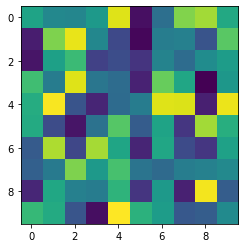

In [2]:
import numpy as np
plt.imshow(np.random.randint(0,255,(10,10)));

The above way of creating a figure is a sort of shortcut. The "correct" way of creating a figure that you should use if you want more control over it is:

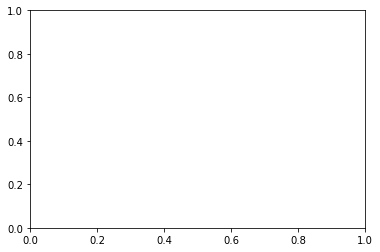

In [3]:
fig, ax = plt.subplots()

As you can see, the above commmand ```plt.subplots()``` creates an empty figure (with only one subplot) and returns two variables ```fig``` and ```ax```. ```fig``` is the *entire figure* which potentially could contain multiple parts. The ```ax``` variable represents the plot itself. Now instead of using ```plt.imshow``` we can use ```ax.imshow``` and finely control the rendering:

Text(0.5, 0, 'my label')

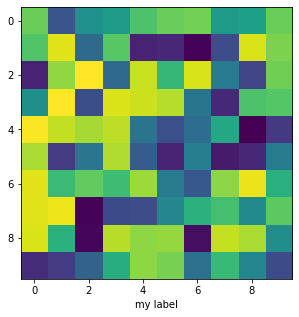

In [4]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(np.random.randint(0,255,(10,10)))
ax.set_xlabel('my label')


Above we have used:
- an optional parameter ```figsize``` with which we can set the size of the figure
- added an axis label using the ```set_xlabel``` method on ```ax```

You can decide on the formatting of your plots in the tiniest detail with Matplotlib. More information on subplots can be found at https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

Let us try another example but this time with 3 subplots in a single row

C:\Users\chris\miniconda3\envs\mypycv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(3,)


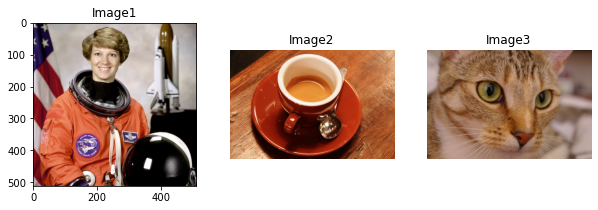

In [5]:
import skimage
from skimage import data

#load some images
img1 = data.astronaut()
img2 = data.coffee()
img3 = data.chelsea()

#combine them in a single numpy array (for ease of indexing below)
img = [img1, img2, img3]

#create 3 subplots. 
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

#The returned ax is a numpy array containing the list of created Axes. 
#Since this figure has 1 row and 3 columns, ax will be a 1D array
#So we can access individual subplots using ax[0], ax[1], etc.
print(ax.shape)

#ax.flat allows to flatten the array so that it can be iterated over (using a for-loop, for example)
#it is also possible to get all the subplots associated with the figure using fig.get_axes()
for i, aa in enumerate(ax.flat): #fig.get_axes() will also work
    aa.set_axis_off() #remove axis for each image
    aa.imshow(img[i]) #display each image
    aa.set_title('Image' + str(i + 1)) #set title
    
ax[0].set_axis_on() #set the axis back on for the first subplot

## Part A (5 points)

 - Play with the *figsize* above. What do you observe as the numbers change?
 - Additionaly, load the camera image. And display the 4 images in 2 rows and 2 columns.
     - Note: the returned ax will *not* be a 1D numpy array anymore (why?)
 - Ensure that only the outer axes are labeled and that the images share both the x and y axes. See below for desired output.
 
 ![Parta_output](part1_output.png)

(2, 2)


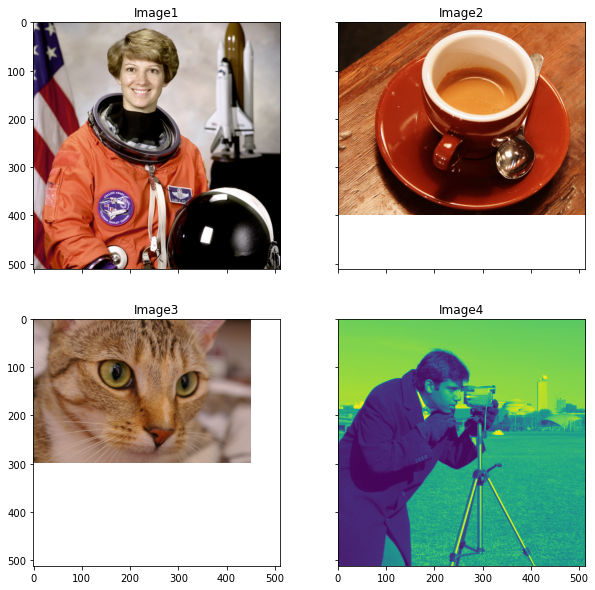

In [6]:
# YOUR CODE HERE

#load some images
img1 = data.astronaut()
img2 = data.coffee()
img3 = data.chelsea()
img4 = data.camera()

img = [img1, img2, img3, img4]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex = True, sharey = True)

print(ax.shape)

for i, aa in enumerate(ax.flat): #fig.get_axes() will also work
    aa.label_outer() #remove axis for each image
    aa.imshow(img[i]) #display each image
    aa.set_title('Image' + str(i + 1)) #set title



#raise NotImplementedError()

## Image histogram

We have seen in this week's lecture how the gray levels can be transformed (by adding a constant, by a multiplicative factor, by a stretching function, etc.). Another very common task is to look at the distribution of pixel intensities in the form of a histogram, i.e. count how many times each pixel value (or range) appears in an image and display it a a bar. This allows to get a quick estimate of the intensities present in an image and to check for problems like saturation.

We have already seen that we could use Matplotlib's ```imshow``` function to display an image. Now we look at a second plotting function from that library which generates such a histogram ```plt.hist()```. We want to compute the histogram on **all pixels** and for that we cannot use our 2D image as input. We first need to **flatten** the image into one long series of number. This can be done with the ```ravel()``` method of the array:

(303, 384)

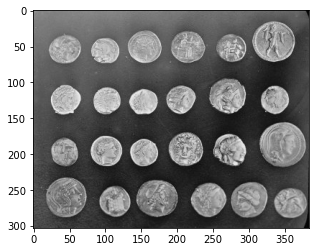

In [7]:
image = data.coins()
plt.imshow(image, cmap = 'gray')
image.shape

The expected length of the unfolded image is:

In [8]:
303 * 384

116352

In [9]:
image.ravel().shape

(116352,)

Now we can pass this unfolded version of the image to the histogram function:

(array([ 2921., 26971., 21621., 16475., 13331., 11734., 11920.,  8242.,
         2730.,   407.]),
 array([  1. ,  26.1,  51.2,  76.3, 101.4, 126.5, 151.6, 176.7, 201.8,
        226.9, 252. ]),
 <BarContainer object of 10 artists>)

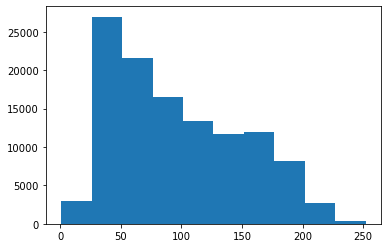

In [10]:
plt.hist(image.ravel()) #Note the output of this function being displayed below.

The [`hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function computes histogram with a default number of `10` bins. 

What are bins? They indicate which graylevels should be grouped together when computing the histogram. For example, if `bins = 256`, then the frequency of each graylevel is computed independently. If `bins = 64`, then every four graylevels are grouped and frequency computed for each group. And so on...

[ 2921. 26971. 21621. 16475. 13331. 11734. 11920.  8242.  2730.   407.]
[  1.   26.1  51.2  76.3 101.4 126.5 151.6 176.7 201.8 226.9 252. ]


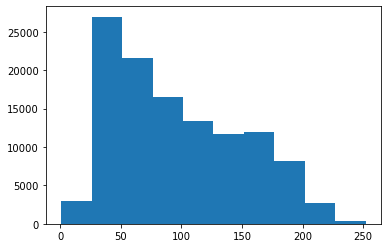

In [11]:
n, bins, _ = plt.hist(image.ravel())
print(n)
print(bins) #prints the pixel count in each bin

## Part B (5 points)

Write a function to compute histogram of an input image with fixed number of bins.

In [12]:
def computeHistogram(image, nBins):
    '''
    Computes the histogram of the input image with number of bins provided as a parameter. 
    Returns a list containing the pixel count in each bin
    '''
    n, bins, _ = plt.hist(image.ravel(), nBins)
    return n
    # YOUR CODE HERE
    #raise NotImplementedError()

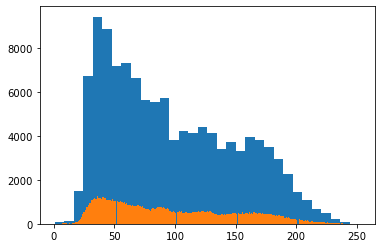

In [13]:
coin = data.coins()
n = computeHistogram(coin, 32)

assert(len(n) == 32)
assert(n[0] == 80)

n = computeHistogram(coin, 256)
assert(len(n) == 256)
assert(n[35] == 1264)

#Note this cell has some hidden tests that will test your code for different images and bins. 
#To get credit, ensure that your code works for an arbitrary image and bins.



## Image types

In the above historgram we see that our maximum value is around 250, actually it is:

In [14]:
image.max()

252

Has this number any meaning? Let's look at what type of numbers we have inside the array:

In [15]:
image.dtype

dtype('uint8')

The above output indicates that we have an unsigned 8-bit integer image. This means that the pixels can take all possible values between 0 and $2^8 = 256$ (not included). This is the reason why the maximum possible value in our array is 255.

We have to be somewhat careful with this. Let's look at a small portion of the image by cropping it:

In [16]:
image[0:3, 0:3]

array([[ 47, 123, 133],
       [ 93, 144, 145],
       [126, 147, 143]], dtype=uint8)

Now let us do some operation: we want to remove an estimated background that we here arbitrarily set at 40. We now have to subtract this value from each pixel in the image, so we do:

In [17]:
image[0:3, 0:3] - 40

array([[  7,  83,  93],
       [ 53, 104, 105],
       [ 86, 107, 103]], dtype=uint8)

All is fine, the value 40 has been subtracted from each pixel. Now let's imagine that the background has been estimated to 128:

In [18]:
image[0:3, 0:3] - 128

array([[175, 251,   5],
       [221,  16,  17],
       [254,  19,  15]], dtype=uint8)

Something strange happened: for example the original value 133 has indeed become 5, but the value 123 has become 251 ?!

The type of our array is 8 bit. This means that it can **only** take values between 0-255. So when we compute 123-128, we **cannot obtain a negative value**. What happens is that instead we subtract first 123, reach the value 0, and then essentially end-up at the other end of the possible range of values which which is 255 and then remove additionally 5 and end-up with the value 251.

We can see the strange result of such an operation by plotting:

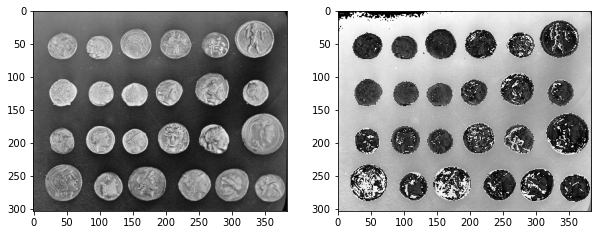

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(image, cmap = 'gray')
ax[1].imshow(image-128, cmap = 'gray');

Note the coin in the bottom left where reducing the intensity by 128 has actually led it to become brighter! Not to mention that the already dark background has become brighter.

What can we do to fix this problem ? We have to change the type of our image so that it can accomodate this mathematical operation. For example we can turn it into a float image. For this we use the ```astype``` function:

In [20]:
import numpy as np

image_float = image.astype(np.float16)

In [21]:
#print their types
print(image.dtype, image_float.dtype)

uint8 float16


In [22]:
#print their minimum and max values
print(image.dtype, ':', image.min(), image.max())
print(image_float.dtype, ':', image_float.min(), image_float.max())

uint8 : 1 252
float16 : 1.0 252.0


In [23]:
image_float[0:3, 0:3]

array([[ 47., 123., 133.],
       [ 93., 144., 145.],
       [126., 147., 143.]], dtype=float16)

In [24]:
image_float[0:3, 0:3] - 128

array([[-81.,  -5.,   5.],
       [-35.,  16.,  17.],
       [ -2.,  19.,  15.]], dtype=float16)

Using the `astype` function does not change the values of the image (as one would expect). Another way to convert their type is to use the method `img_as_float` but it has an important side affect.

In [25]:
image_float2 = skimage.img_as_float(image)

In [26]:
#print their minimum and max values
print(image.dtype, ':', image.min(), image.max())
print(image_float2.dtype, ':', image_float2.min(), image_float2.max())

uint8 : 1 252
float64 : 0.00392156862745098 0.9882352941176471


Note the datatype of the converted image. Note, how the pixel values have been rescaled. The rescaling is simply a division by `255`.

In [27]:
image_float3 = image/255
print(image_float3.dtype, ':', image_float3.min(), image_float3.max())

float64 : 0.00392156862745098 0.9882352941176471


## Color spaces

## Part C (6 points)

We will use our understanding of datatypes to write a function that converts a color image to gray scale by simply  averaging the three channels: 

`gray = (R + G + B)/3`

In [28]:
def convertToGrayAndDisplay(img):
    '''
    converts an input color image img (with datatype uint8) into a gray scale by averaging the three color channels.
    displays the original image and the grayscale image in a subplot with 1 row and 2 columns.
    returns the gray scale image    
    '''
    assert(img.shape[2] == 3) #Check there are three channels in the input image
    assert(img.dtype == 'uint8') #Check the input image is of type uint8
    
    image = skimage.img_as_float(img)
    redMap = image[:,:,0]
    greenMap = image[:,:,1]
    blueMap = image[:,:,2]
    
    grayImg = (redMap + greenMap + blueMap)/3
    
    myImgs = [img, grayImg]
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
    
    for i, aa in enumerate(ax.flat): #fig.get_axes() will also work
        aa.label_outer() #remove axis for each image
        aa.imshow(myImgs[i]) #display each image
        aa.set_title('Image' + str(i + 1)) #set title
        
    return grayImg
    # YOUR CODE HERE
    #raise NotImplementedError()

0.00130718954248366 1.0


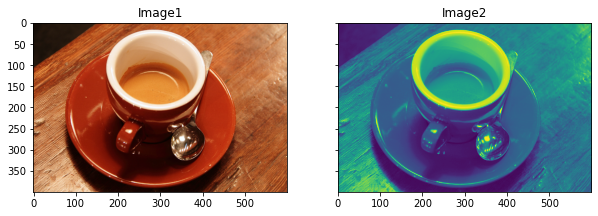

In [29]:
img_color = data.coffee()
#Check that the function displays both the original image and the converted image without any distortions
img_gray = convertToGrayAndDisplay(img_color)
#Check that the minimum and maximum values are between 0 and 1
print(img_gray.min(), img_gray.max())
#check the type of the converted image (should be float64)
assert(img_gray.dtype == 'float64')

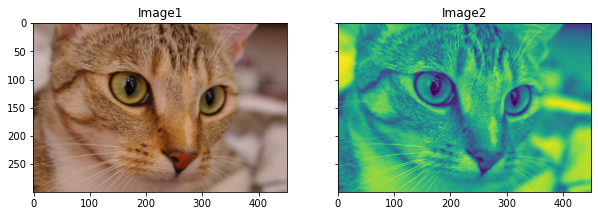

In [30]:
import math
img_color = data.chelsea()
img_gray = convertToGrayAndDisplay(img_color)

assert(math.isclose(img_gray.max(), 0.76209150326))
assert(math.isclose(img_gray.min(), 0.01176470588))

In [2]:
#Some hidden tests below with a different image and different assert




Compare the result of the above function with the output of the [`rgb2gray`](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2gray) function 

In [32]:
#helper function to find sum of absolute difference of pixels between two images
def sumPixelDifference(img1, img2):
    assert(img1.shape == img2.shape)
    return np.sum(np.abs(img1 - img2))

In [33]:
img_gray2 = skimage.color.rgb2gray(img_color)
diff = sumPixelDifference(img_gray, img_gray2)
#since rgb2gray function does not simply average the channels the difference between the images is non-zero!
assert(math.isclose(diff, 1442.713935555556))

Look into the documentation of the `rgb2gray` function. What combination of R, G, B channels does it involve?

Compare with [HSV and YIQ color models](https://www.geeksforgeeks.org/difference-between-rgb-cmyk-hsv-and-yiq-color-models/). 
- HSV: Hue, Saturation and Value are three channels. The value represents the intensity of the colour chosen. 
   - HSV model is used in histogram equalization and converting grayscale images to RGB colour images.
- YIQ: Y stands for luminance part and IQ stands for chrominance part. 
   - YIQ is the most widely colour model used in Television broadcasting.

## Part D (4 points)

Different color models produce a variation of the luminosity (intensity of color). Write a function that finds and returns the Y and V components from YIQ and HSV color models, respectively.

In [34]:
def getYV(img):
    
    '''
    Converts the input image img from RGB color space into HSV and YIQ spaces. 
    Extracts the v component from HSV and Y component from YIQ.
    Returns them in a tuple    
    '''
    # YOUR CODE HERE
    """
    y = [.299, .587, .114]
    i = [.5959, -.2746, -.3213]
    q = [.2115,-.5227, .3112]
    
    redColor = img[:,:,0]
    greenColor = img[:,:,1]
    blueColor = img[:,:,2]
    
    cyanColor = redColor * -1
    magentaColor = greenColor * -1
    yellowColor = blueColor * -1
    
    yColor = y[0] * redColor + y[1] * greenColor + y[2] * blueColor
    iColor = i[0] * redColor + i[1] * greenColor + i[2] * blueColor
    qColor = q[0] * redColor + q[1] * greenColor + q[2] * blueColor
    """
    
    imgHSV = skimage.color.rgb2hsv(img)
    imgYIQ = skimage.color.rgb2yiq(img)
    
    return (imgHSV[:,:,2],imgYIQ[:,:,0])
    
    
    #raise NotImplementedError()

Text(0.5, 1.0, 'V channel from HSV')

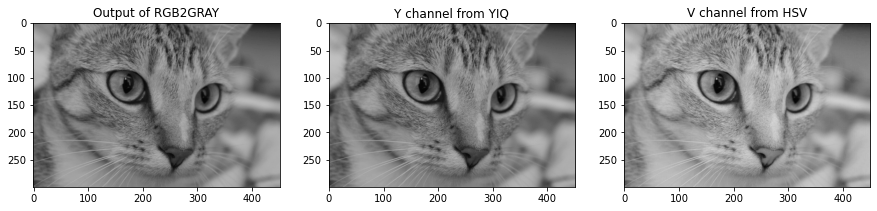

In [35]:
img_color = data.chelsea()
(img_V, img_Y) = getYV(img_color)

#Compare outputput of rgb2gray with Y (from YIQ) and V (from HSV) 
#(since they all correspond to the intensity of color)

img_gray2 = skimage.color.rgb2gray(img_color)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
#Plot without rescaling values
ax1.imshow(img_gray2, cmap = 'gray', vmin = 0, vmax = 1)
ax2.imshow(img_Y, cmap = 'gray', vmin = 0, vmax = 1)
ax3.imshow(img_V, cmap = 'gray', vmin = 0, vmax = 1)
ax1.set_title("Output of RGB2GRAY")
ax2.set_title("Y channel from YIQ")
ax3.set_title("V channel from HSV")

#Now change the image, and observe the change in output.. how different do these intensity channels look?

In [36]:
img_color = data.chelsea()
(img_V, img_Y) = getYV(img_color)

img_gray2 = skimage.color.rgb2gray(img_color)

diff1 = sumPixelDifference(img_gray2, img_Y)
diff2 = sumPixelDifference(img_gray2, img_V)

assert(math.isclose(diff1, 1121.1601635294))
assert(math.isclose(diff2, 16085.110459999))

#Some hidden tests below with a different image 
